# Hunting exoplanets with Machine Learning
### Inteligencia Artificial para los Sistemas de Control Autónomos
### Máster de Ciencia y Tecnología desde el Espacio


## Objectives

- Deal with a very unbalanced dataset.
- Deal with high-dimensional data.
- Hyperparameter optimization with grid and random search.
- Feature engineering.
- Anomaly detection?

## Introduction

Blablabla.

Remember that the workflow usually implemented in ML projects is as follows.

1. Data adquisition
2. Exploratory analysis
3. Data preprocessing
4. Model training
5. Model validation


## Libraries import

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

## Data adquisition

In this case the dataset comes in two separate files, one for training and one for valication. This is a rather common practice in complex datasets published in public repositories.

In [2]:
train_df = pd.read_csv("exoTrain.zip")
test_df = pd.read_csv("exoTest.zip")

In [3]:
train_df.shape

(5087, 3198)

In [4]:
test_df.shape

(570, 3198)

In [5]:
train_df.columns

Index(['LABEL', 'FLUX.1', 'FLUX.2', 'FLUX.3', 'FLUX.4', 'FLUX.5', 'FLUX.6',
       'FLUX.7', 'FLUX.8', 'FLUX.9',
       ...
       'FLUX.3188', 'FLUX.3189', 'FLUX.3190', 'FLUX.3191', 'FLUX.3192',
       'FLUX.3193', 'FLUX.3194', 'FLUX.3195', 'FLUX.3196', 'FLUX.3197'],
      dtype='object', length=3198)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [7]:
train_df['LABEL'].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [8]:
test_df['LABEL'].value_counts()

1    565
2      5
Name: LABEL, dtype: int64

We observe that this dataset is:
* Very unbalanced, with 5050 systems without exoplanet versus only 37 with exoplanet!.
* High-dimensional problem with 3197 dimensions.
* The label is given with a number (one or two) instead of a string.
* The dataset is actually a univariable time-series, and thus our task is time-series classification.
* The dataset occupies 124.1 MB, which is not too much, but it's little either.
* There are only five exoplanets in the test set!

How can we handle this problem?
* Just like another classification task.
* Oversampling the minority class.
* Subsampling the majority class.
* Creating new samples from the minority class.
* Better performance measures.


## Exploratory Data Analysis

In [9]:

## THIS EDA IS AN EXERCISE
## YOUR CODE HERE


In [10]:
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [11]:
train_df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


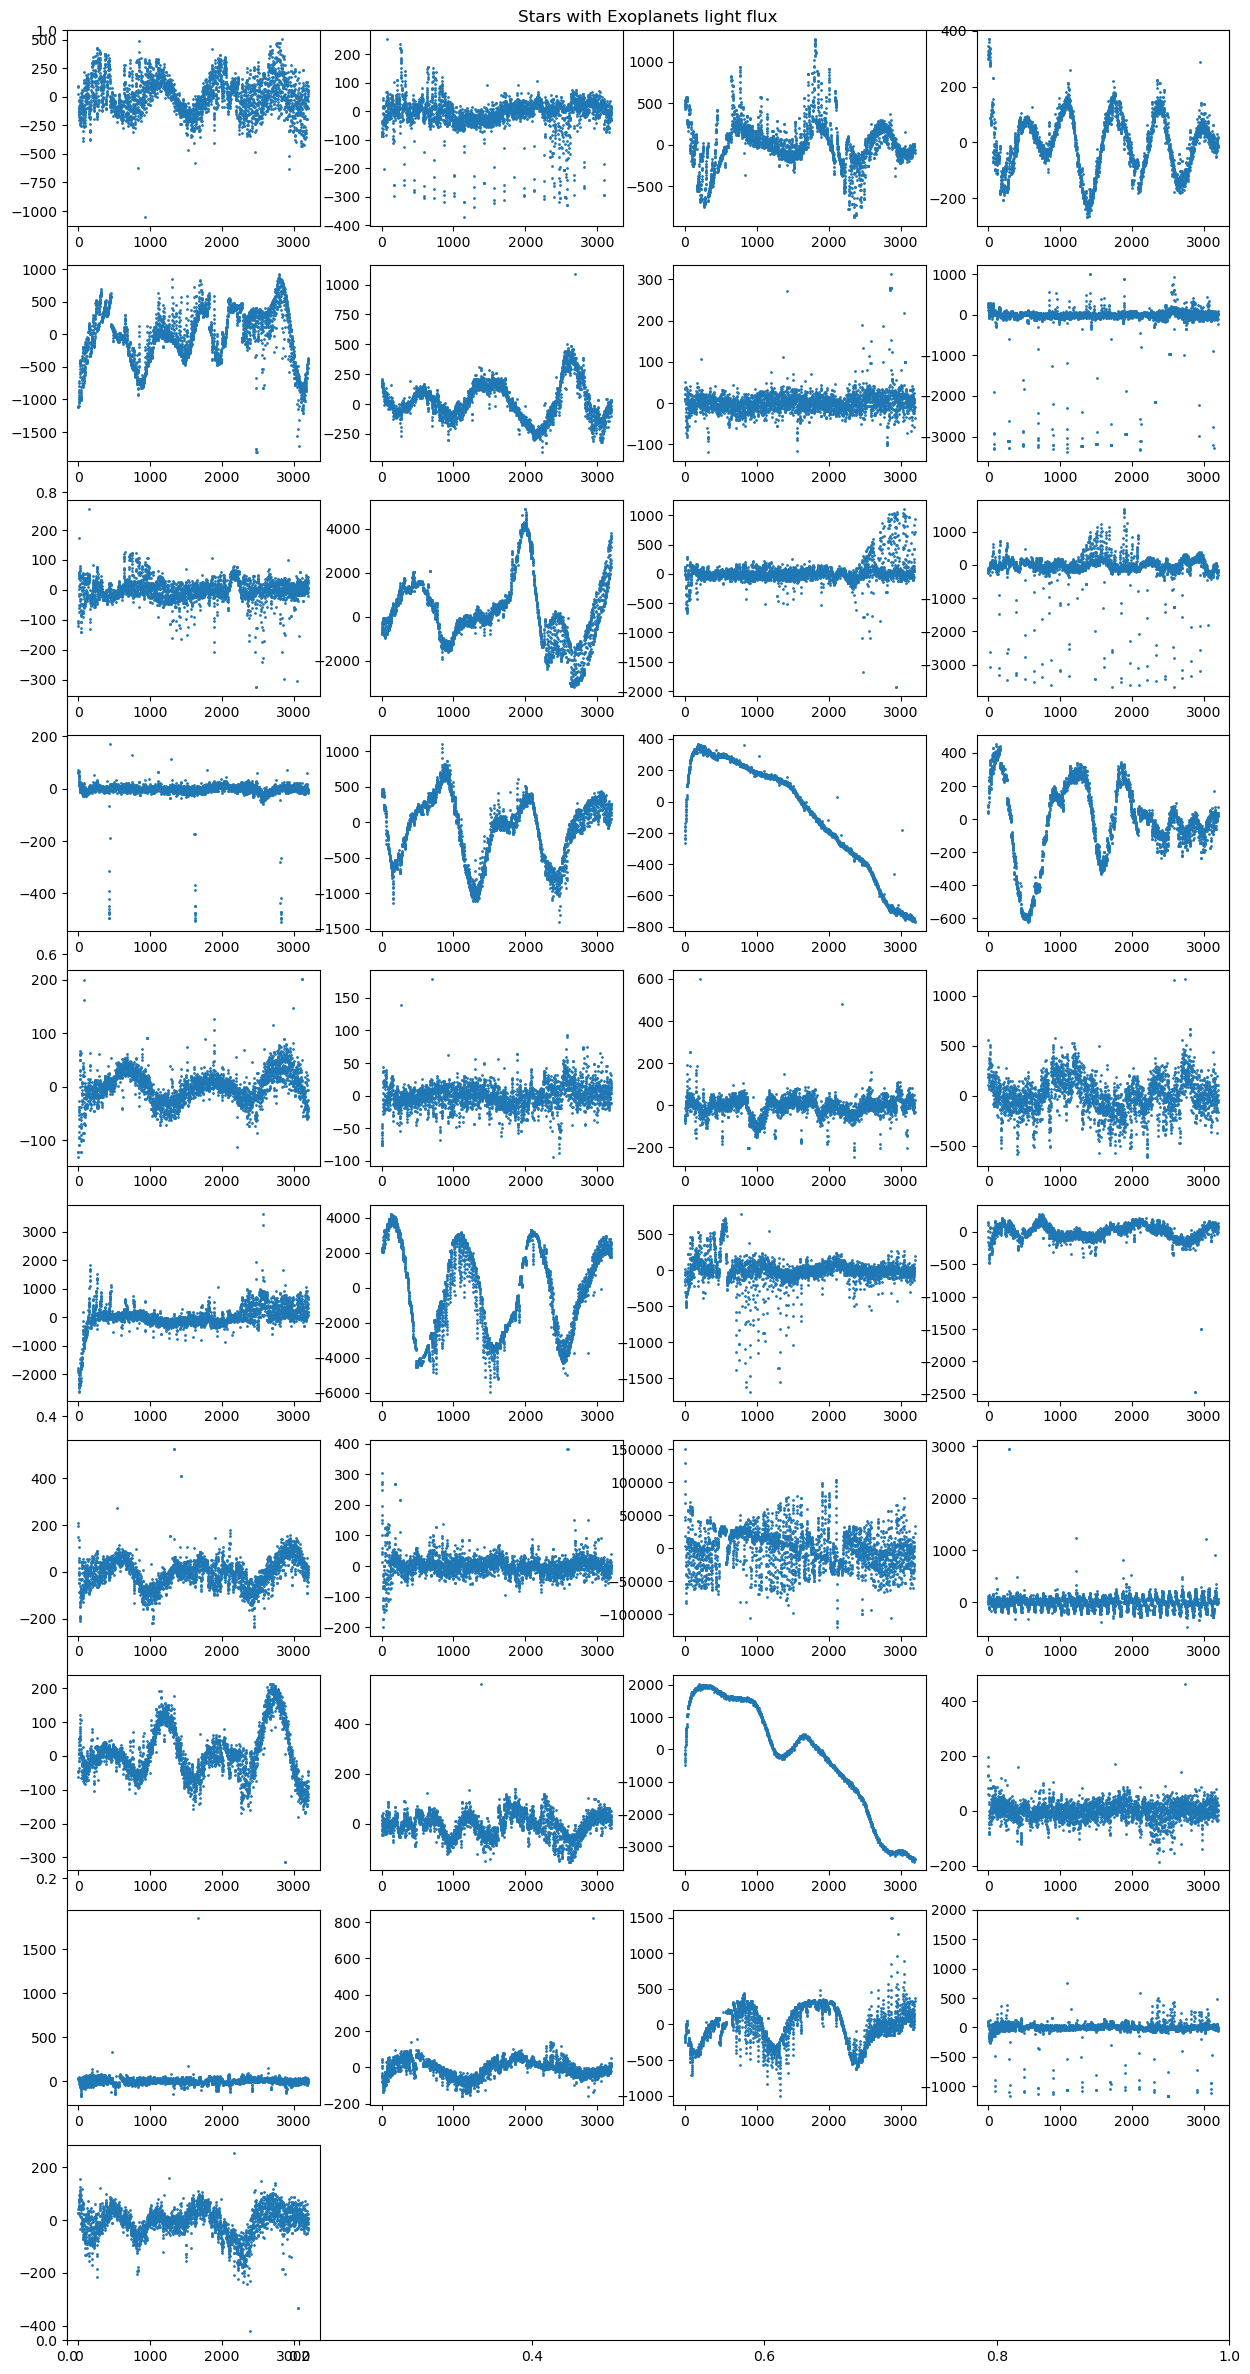

In [49]:
fig = plt.figure(figsize=(15,30))
plt.title('Stars with Exoplanets light flux')

for i in range(37):
    ax = fig.add_subplot(10, 4, i+1)
    ax.scatter(np.arange(3197), train_df[train_df['LABEL']==2].iloc[i, 1:], s=1)

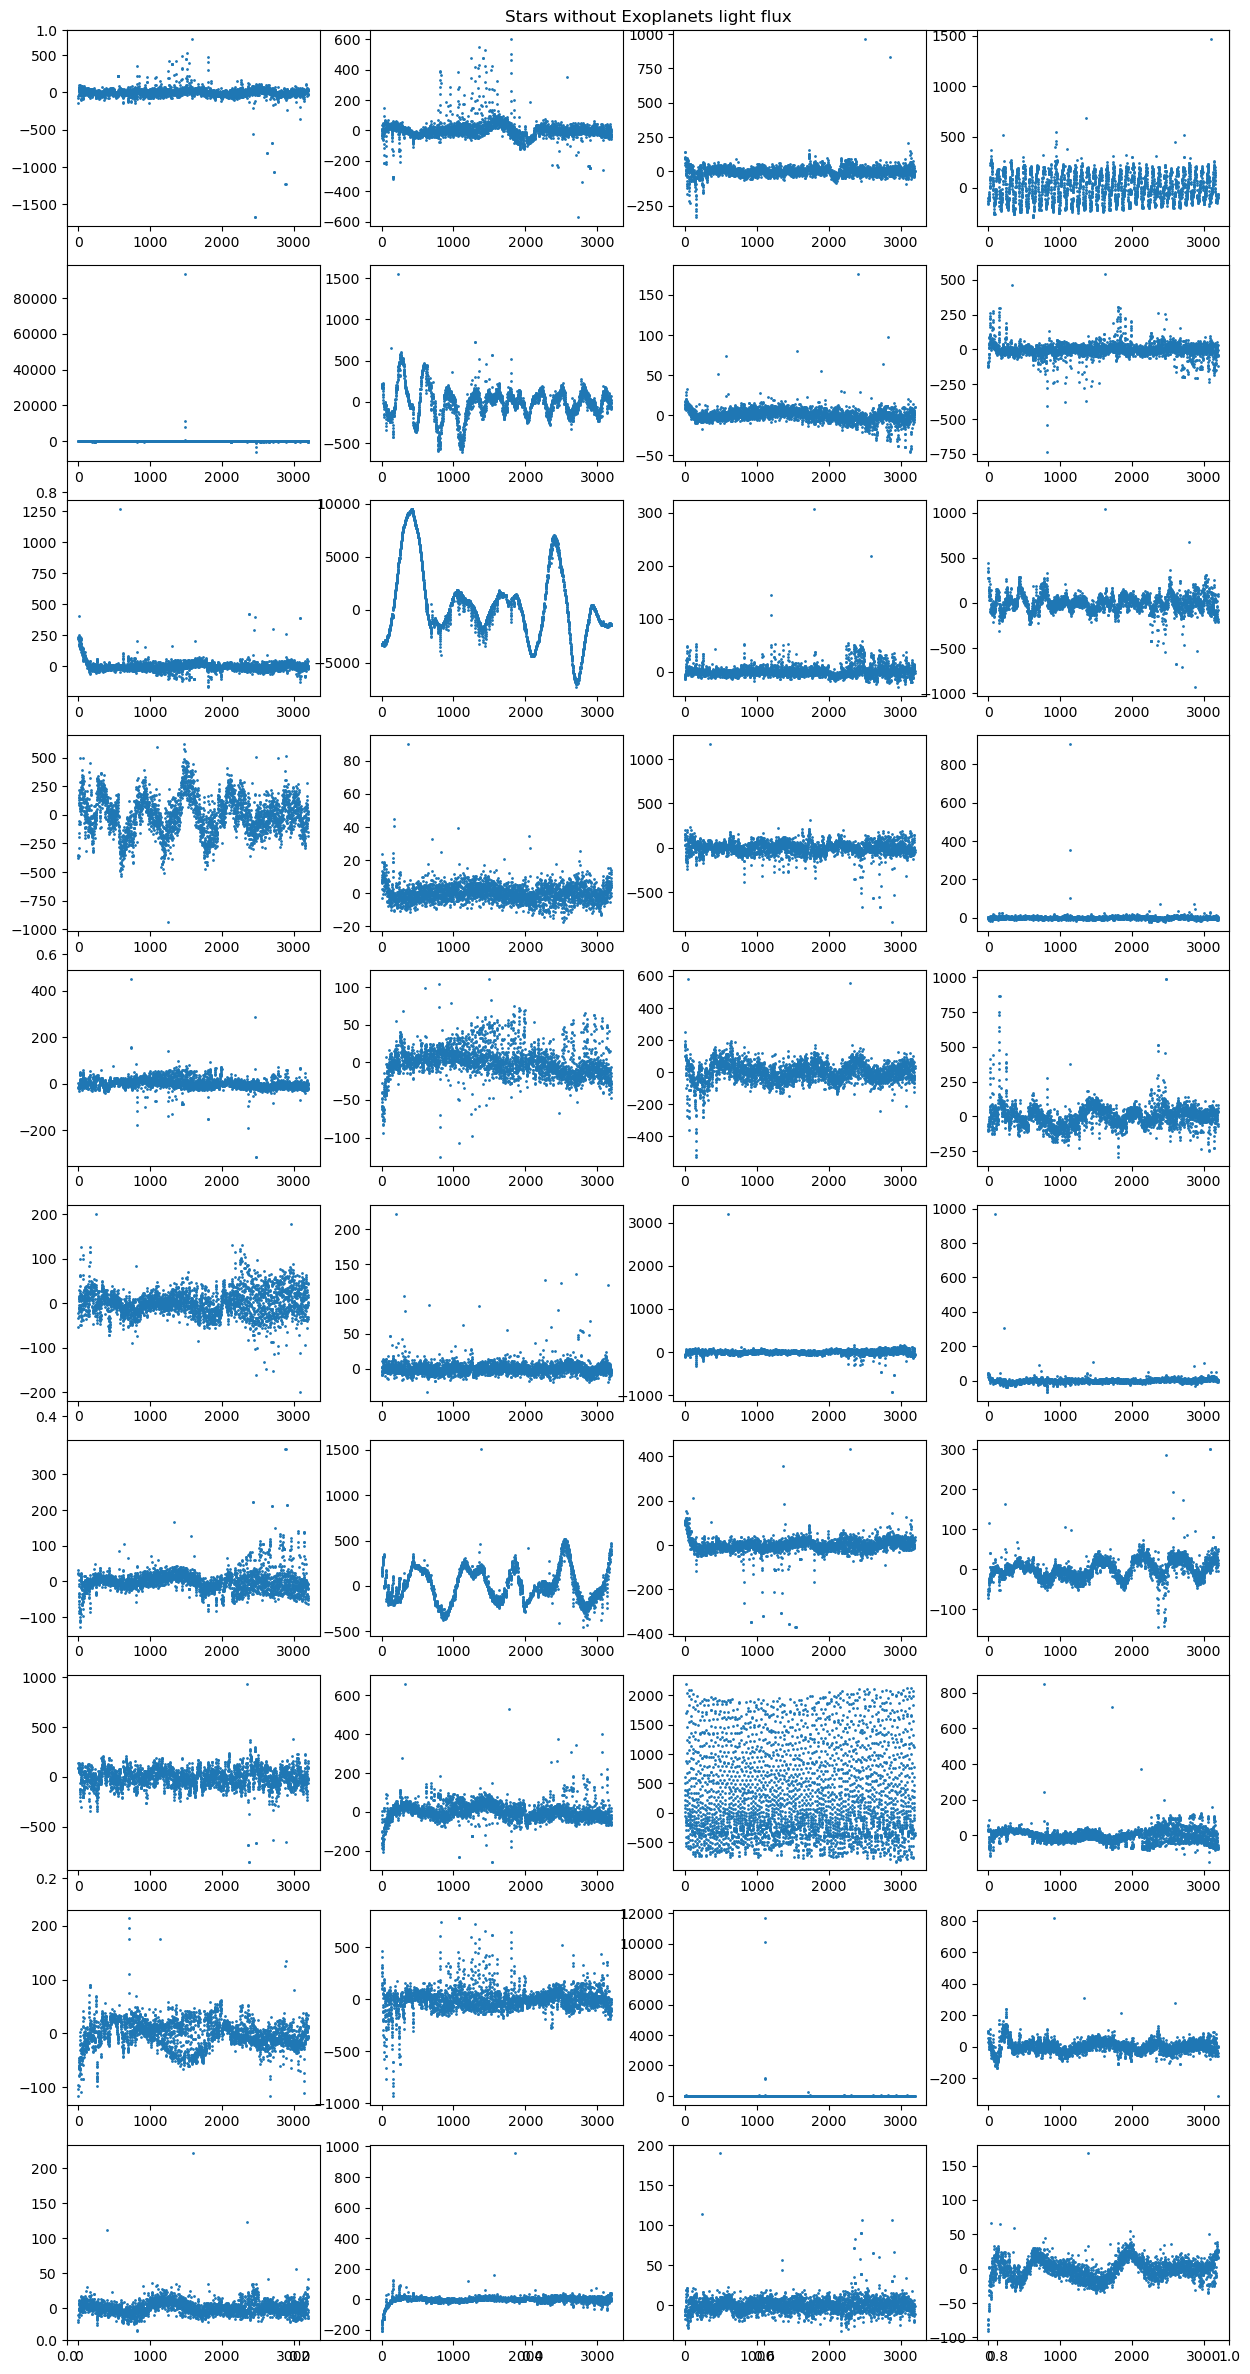

In [51]:
fig = plt.figure(figsize=(15,30))
plt.title('Stars without Exoplanets light flux')

for i in range(40):
    ax = fig.add_subplot(10, 4, i+1)
    ax.scatter(np.arange(3197), train_df[train_df['LABEL']==1].iloc[i, 1:], s=1)

In [116]:
trainExo = train_df[train_df['LABEL']==1].iloc[:,1:].T[:100]
trainNoExo = train_df[train_df['LABEL']==2].iloc[:,1:].T

print(trainExo.shape)
print(trainNoExo.shape)

from sklearn.preprocessing import StandardScaler

#scaler = MinMaxScaler()
#scaler.fit(trainExo)
#scaled = scaler.fit_transform(trainExo)
#trainExo = pd.DataFrame(scaled, columns=trainExo.columns)

#scaled = scaler.fit_transform(trainNoExo)
#trainNoExo = pd.DataFrame(scaled, columns=trainNoExo.columns)

#del scaled

(100, 5050)
(3197, 37)


In [117]:
exoStatistics = pd.DataFrame()
exoStatistics['mean'] = np.log(trainExo.mean())
exoStatistics['median'] = np.log(trainExo.median())
exoStatistics['min'] = trainExo.min()
exoStatistics['max'] = np.log(trainExo.max())
exoStatistics['std'] = trainExo.std()
exoStatistics['kurtosis'] = trainExo.kurtosis()
exoStatistics['skewness'] = trainExo.skew()
exoStatistics['label'] = "Exoplanets"

noexoStatistics = pd.DataFrame()
noexoStatistics['mean'] = np.log(trainNoExo.mean())
noexoStatistics['median'] = np.log(trainNoExo.median())
noexoStatistics['min'] = trainNoExo.min()
noexoStatistics['max'] = np.log(trainNoExo.max())
noexoStatistics['std'] = trainExo.std()
noexoStatistics['kurtosis'] = trainNoExo.kurtosis()
noexoStatistics['skewness'] = trainNoExo.skew()
noexoStatistics['label'] = "No exoplanets"

statistics = pd.concat([exoStatistics, noexoStatistics])
statistics.head()

/home/david/anaconda3/envs/ml37/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/david/anaconda3/envs/ml37/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,mean,median,min,max,std,kurtosis,skewness,label
37,2.675623,3.205791,-141.22,4.582413,48.649671,0.229140,-0.712665,Exoplanets
38,NaN,2.218660,-218.10,4.969674,61.840125,4.392177,-1.826282,Exoplanets
39,0.732127,2.739549,-230.71,4.958640,72.692844,0.844221,-0.891077,Exoplanets
40,2.221939,NaN,-259.70,5.927406,167.376699,-1.110985,0.278959,Exoplanets
41,4.203414,4.186696,-125.62,5.505941,99.514018,-0.807339,-0.096461,Exoplanets


In [118]:
statistics.describe()

,mean,median,min,max,std,kurtosis,skewness
count,2680.000000,2492.000000,5087.000000,4990.000000,5050.000000,5087.000000,5087.000000
mean,2.582616,-inf,-1196.673855,4.730351,774.815558,3.363686,0.426357
std,2.280604,NaN,22312.163951,1.600397,12099.307904,16.965030,1.590300
min,-5.914504,-inf,-892477.410000,-0.356675,1.629754,-1.672488,-8.901121
25%,1.118422,0.998787,-211.870000,3.564024,13.844825,-0.473910,-0.321063
50%,2.545057,2.510615,-70.970000,4.583945,39.970086,0.154424,0.164633
75%,4.051991,3.959693,-23.935000,5.691659,112.297847,1.403422,0.726422
max,13.896446,13.966826,580497.500000,14.774149,541740.232313,834.933709,20.555620


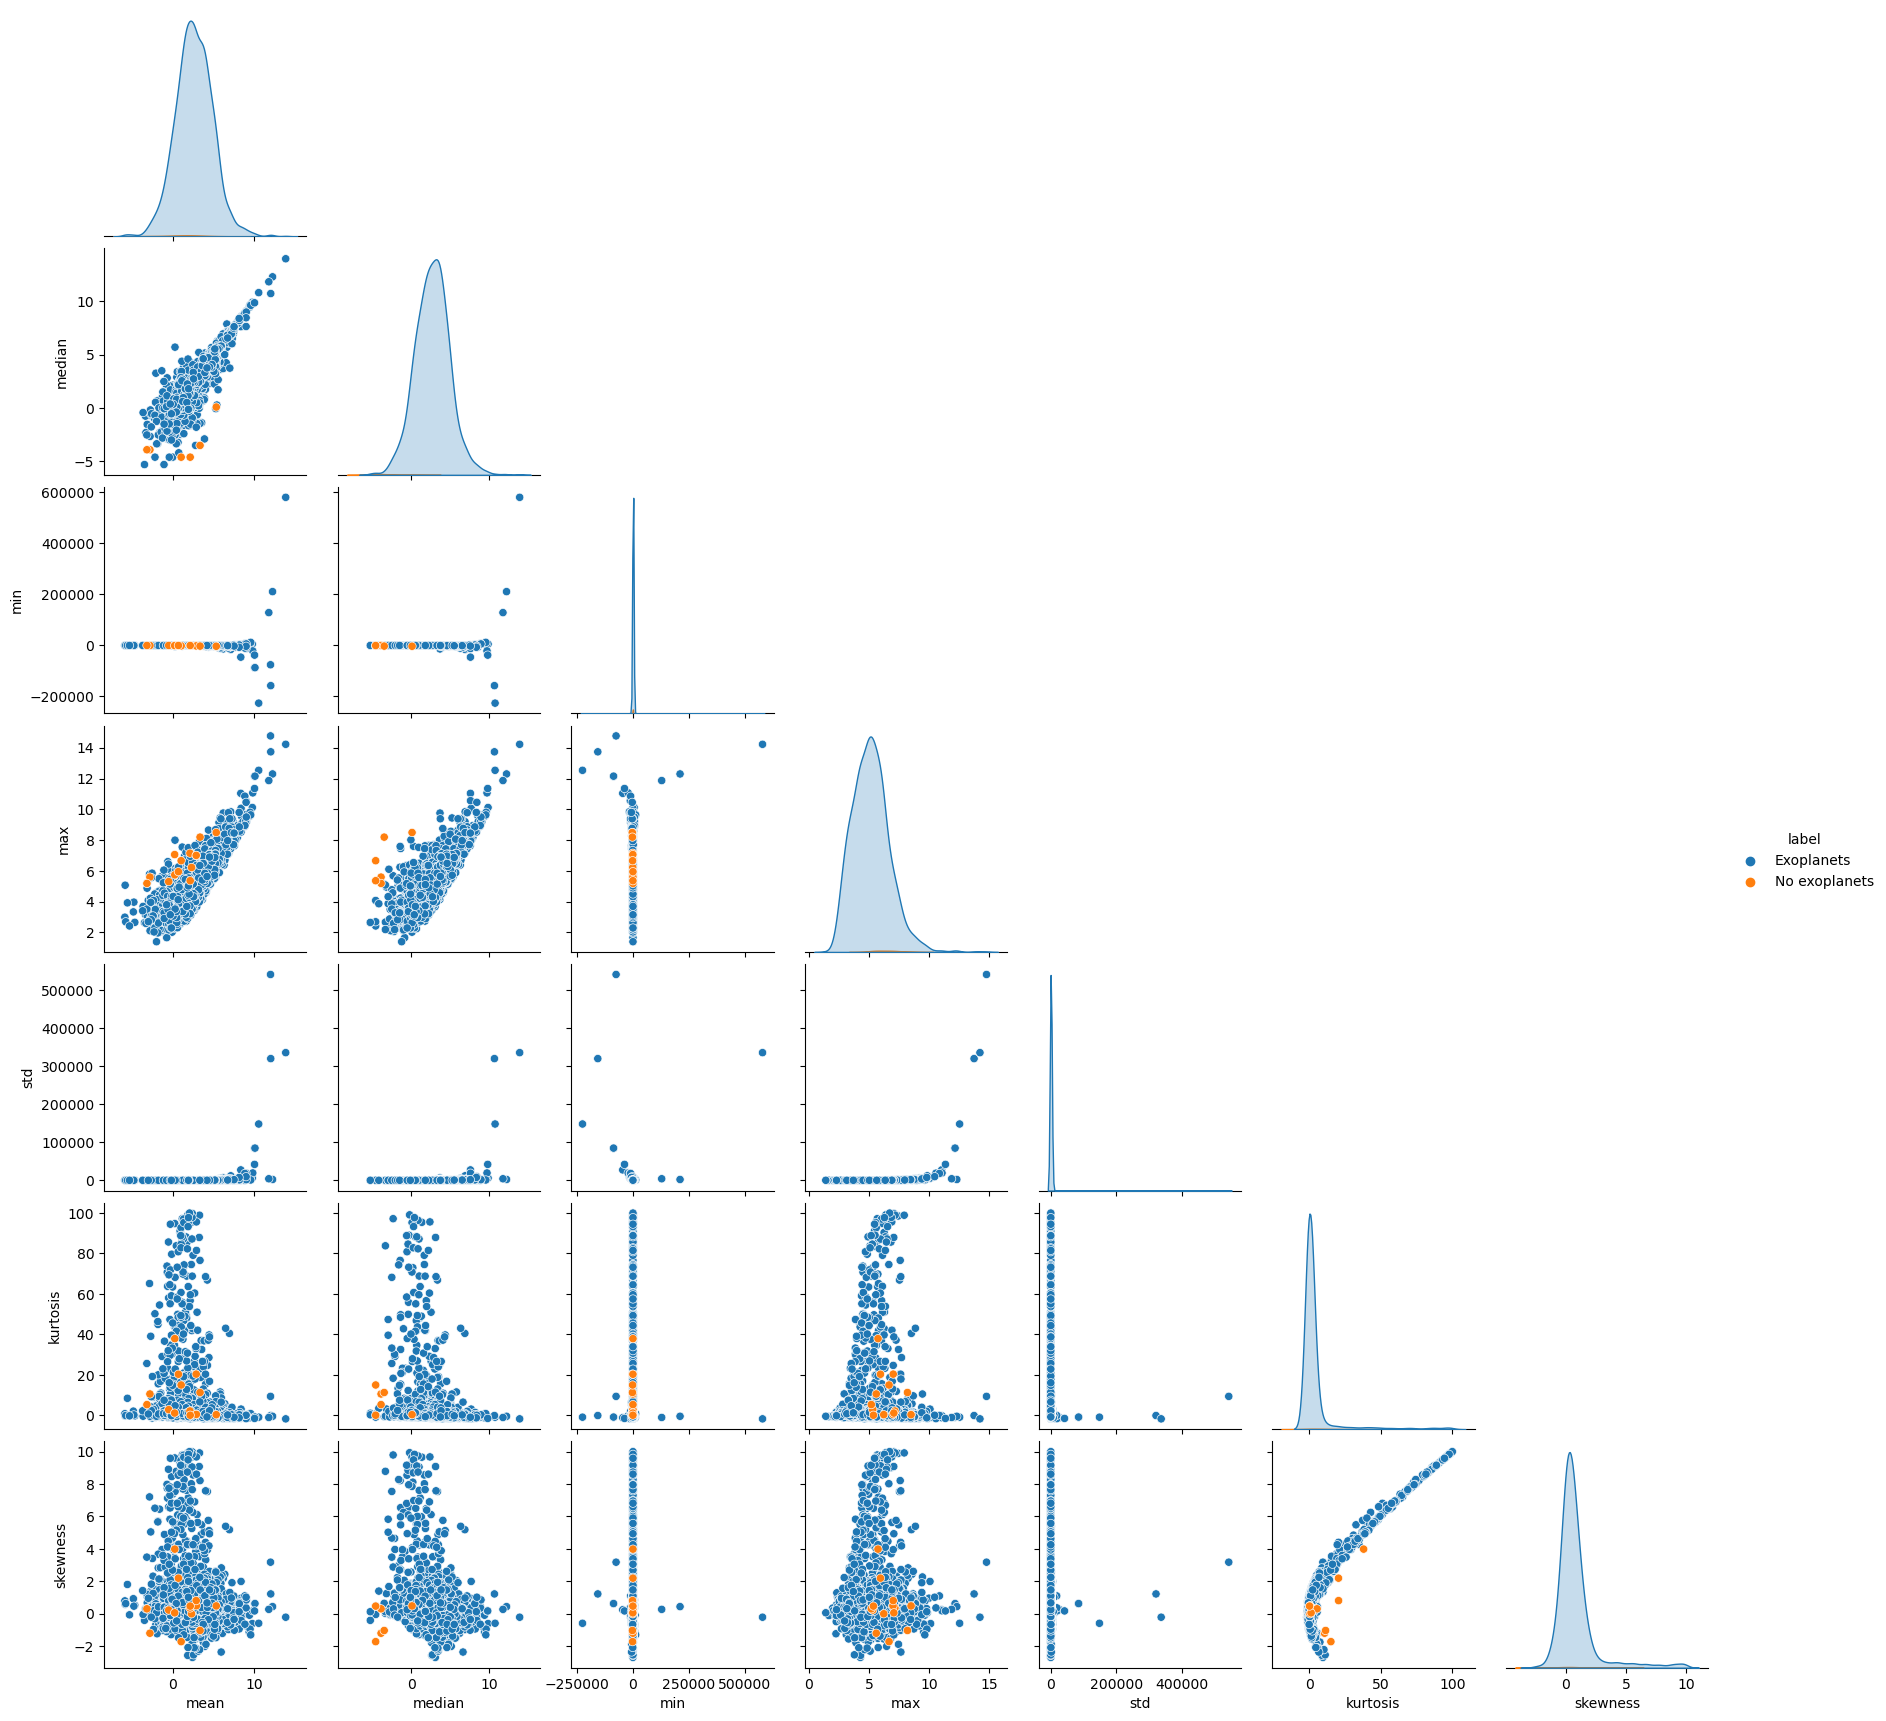

In [119]:
sns.pairplot(statistics[(statistics['mean']<1e6) & (statistics['kurtosis']<500)], hue="label", corner=True)

Check the existence of nans and nulls, this is no so trivial because of the number of attributes.

In [143]:
a = train_df.iloc[:,1:].apply(lambda x : x.isna().sum())

print(a[a > 0])

Series([], dtype: int64)


Given the high dimensionality of this problem, it pays off to study how much of that information is linearly dependent, it can be done with PCA.

In [144]:
print(train_PCA['LABEL'].value_counts())

NameError: name 'train_PCA' is not defined

The conclusion should be that the dataset is perfecty balanced with 11 classes, clean, without outlayers and valid for predictive modeling.

## Preprocess data


In [120]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [121]:
X_train = train_df.drop("LABEL", axis=1)
X_test = test_df.drop("LABEL", axis=1)
y_train = train_df['LABEL']
y_test = test_df['LABEL']

# Given the size of the dataset, we delete unnecesary dataframes
#del train_df
#del test_df

#
# Clean your data, if needed
# Store your clean data in train_clean
# 
# YOUR CODE HERE


Now we standarize our data.

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
X = scaler.transform(x)

X

NameError: name 'x' is not defined

We split our data into train and test datasets.

In [123]:
from sklearn.model_selection import train_test_split 
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"X shape: {X.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

NameError: name 'X' is not defined

## Predictive modelling: phase 1

### Set up a baseline

In [124]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_model = dummy_clf.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_model)

0.9912280701754386

In [129]:
from sklearn.metrics import recall_score

recall_score(y_test, y_model)

1.0

In [130]:
y_model[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [131]:
from sklearn.metrics import f1_score

f1_score(y_test, y_model, average='weighted')

0.9868614266944896

In [132]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_model, target_names=["Exoplanet", "No exoplanet"]))

              precision    recall  f1-score   support

   Exoplanet       0.99      1.00      1.00       565
No exoplanet       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



/home/david/anaconda3/envs/ml37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/ml37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/ml37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### K-NN classifier

Model fit:

In [133]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)                  
y_model = model.predict(X_test)             

Model evaluation:

In [134]:
from sklearn.metrics import accuracy_score

results = {}

results['knn'] = accuracy_score(y_test, y_model)
results['knn']

0.9912280701754386

In [135]:
f1_score(y_test, y_model, average='weighted')

0.9868614266944896

#### Support Vector Machine (SVM) classifier

In [136]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)                   
y_model = model.predict(X_test)              

In [137]:
results['svm'] = accuracy_score(y_test, y_model)
results['svm']

0.9912280701754386

In [138]:
f1_score(y_test, y_model, average='weighted')

0.9868614266944896

#### Classification tree

In [139]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)          
y_model = model.predict(X_test)              

In [140]:
results['tree'] = accuracy_score(y_test, y_model)

In [141]:
f1_score(y_test, y_model, average='weighted')

0.9859649122807017

Finally, we compare the accuracy of our models:

In [142]:
results

{'knn': 0.9912280701754386,
 'svm': 0.9912280701754386,
 'tree': 0.9859649122807017}

# Exercises

### Initial steps

1. Understand the workflow implemented in this notebook. You do not need to understand the details of the code but of course it is better if you can understand it. 

2. Complete this notebook filling in the EDA section.

### Cross-validation

3. The validation done above, depending on the size of the dataset and its properties, may not be very reliable. Evaluate the three previous classifiers with 10-folders cross validation and fill the following table and think about to what extend you are free to select any number of folds in cross validation.

| Model | Accuracy | Accuracy (10-CV) |
| ---   | --- | --- | 
| Baseline   |     |    | 
| KNN   | | |
| SVM   | | |
| Tree  | | |

KNN

SVM

Tree

4. Now compare the standard deviation of the accuracy estimated with cross validation for different number of folds (5 and 10). Fill out the following table and try to identify any pattern.

| Model | $\sigma$ (cv=10) | $\sigma$ (cv=5) |
| ---   | --- | --- |
| KNN   |     |     |
| SVM   | | | 
| Tree  | | |

KNN

SVM

Tree

### Alternative evaluation methods

5. Display the confusion matrix for the tree models trained with the train dataset. Do they fail/success in the same way?

KNN

SVM

Tree

6. Scikit-Learn comes with a handy function named classification_report, that provides a range of evaluation metrics for classifiers. Search information about this function and provide a report the SVM classifier.

### Hyper parameter optimization

7. Train a KNN model for different values of *n_neighbors* and plot its accuracy.

8. Train a SVM classifier for different values of *C* and plot its accuracy. Search in Internet which values of C are reasonable.

9. Train a classification tree for diferent values of *max_depth* and plot its accuracy. This hyperparameter determines the maximun depth that is allowed to the learned tree.

### Predictive modeling Phase 2: Feature engineering

Let's visualize flux for a system with and without exoplanets.

In [ ]:
exo_df = train_df[train_df['LABEL'] == 2].drop("LABEL", axis=1)
noexo_df = train_df[train_df['LABEL'] == 1].drop("LABEL", axis=1)

print(exo_df.isna().sum())
print(noexo_df.info())

print(exo_df.shape)
print(noexo_df.shape)

In [ ]:
algo = exo_df.iloc[1,1:]

algo.info()

In [ ]:
sns.histplot(algo[10:])

In [ ]:
fig = plt.figure(figsize=(15,40))
plt.title('Stars with Exoplanets')

for i in range(12):
    ax = fig.add_subplot(14, 4, i+1)
    ax.scatter(np.arange(3197), np.array(exo_df.iloc[i,1:]), s=1)

In [ ]:
plt.plot([i + 1 for i in range(exo_df.shape[1])])

In [ ]:
sns.lineplot(data=exo_df.iloc[1, :].T)

## PHASE 3: PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=1)

print(f"5-CV accuracy estimation: {cross_val_score(model, X, y, cv=5).mean()}")

In [ ]:
# PCA ANALYSIS HERE



from sklearn.decomposition import PCA 

model = PCA(n_components=2)           
model.fit(train_df.drop("LABEL", axis=1)) 
X_2D = model.transform(train_df.drop("LABEL", axis=1))        

train_PCA = pd.DataFrame()
train_PCA['PCA1'] = np.log(X_2D[:, 0]) # We take logs because of the large variance
train_PCA['PCA2'] = np.log(X_2D[:, 1])
train_PCA['LABEL'] = train_df['LABEL']

sns.scatterplot(x="PCA1", y="PCA2", hue="LABEL", style="LABEL", data=train_PCA);
plt.xlabel("log(PCA1)")
plt.ylabel("log(PCA2)")

In [ ]:
pca = PCA().fit(train_df)

plt.plot(np.cumsum(pca.explained_variance_ratio_)[:40])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = PCA(n_components=15)           
model.fit(train_df.drop("LABEL", axis=1)) 
X_2D = model.transform(train_df.drop("LABEL", axis=1))        

train_PCA = pd.DataFrame()
train_PCA['PCA1'] = np.log(X_2D[:, 0]) # We take logs because of the large variance
train_PCA['PCA2'] = np.log(X_2D[:, 1])
train_PCA['LABEL'] = train_df['LABEL']


model = DecisionTreeClassifier()
model.fit(X_2D, y_train)          
#y_model = model.predict(X_test)       

In [ ]:
results['tree'] = accuracy_score(y_test, y_model)

In [ ]:
f1_score(y_test, y_model, average='weighted')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()),
 ('pca', PCA(n_components=15)),
 ('clf', DecisionTreeClassifier())])
pipe.fit(X_train, y_train)    
y_model = model.predict(X_test)  

In [ ]:
results['tree'] = accuracy_score(y_test, y_model)